In [1]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

## Access data

In [2]:
df_raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')
df_raw.to_csv('spy_appl_2010_2019.csv')

[*********************100%***********************]  2 of 2 completed


In [3]:
df_raw

Adj Close                  Close                   High  \
                 AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2010-01-04   6.496294   88.117889   7.643214  113.330002   7.660714   
2010-01-05   6.507527   88.351143   7.656429  113.629997   7.699643   
2010-01-06   6.404016   88.413353   7.534643  113.709999   7.686786   
2010-01-07   6.392176   88.786560   7.520714  114.190002   7.571429   
2010-01-08   6.434673   89.082039   7.570714  114.570000   7.571429   
...               ...         ...        ...         ...        ...   
2019-12-23  69.355125  305.051208  71.000000  321.220001  71.062500   
2019-12-24  69.421066  305.060699  71.067497  321.230011  71.222504   
2019-12-26  70.798409  306.684540  72.477501  322.940002  72.495003   
2019-12-27  70.771545  306.608582  72.449997  322.859985  73.492500   
2019-12-30  71.191566  304.918152  72.879997  321.079987  73.172501   

                              Low                   Open              \
                   SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2010-01-04  113.389999   7.585000  111.510002   7.622500  112.370003   
2010-01-05  113.680000   7.616071  112.849998   7.664286  113.260002   
2010-01-06  113.989998   7.526786  113.430000   7.656429  113.519997   
2010-01-07  114.330002   7.466071  113.180000   7.562500  113.500000   
2010-01-08  114.620003   7.466429  113.660004   7.510714  113.889999   
...                ...        ...         ...        ...         ...   
2019-12-23  321.649994  70.092499  321.059998  70.132500  321.589996   
2019-12-24  321.519989  70.730003  320.899994  71.172501  321.470001   
2019-12-26  322.950012  71.175003  321.640015  71.205002  321.649994   
2019-12-27  323.799988  72.029999  322.279999  72.779999  323.739990   
2019-12-30  323.100006  71.305000  320.549988  72.364998  322.950012   

               Volume             
                 AAPL        SPY  
Date                              
2010-01-04  493729600  118944600  
2010-01-05  601904800  111579900  
2010-01-06  552160000  116074400  
2010-01-07  477131200  131091100  
2010-01-08  447610800  126402800  
...               ...        ...  
2019-12-23   98572000   52990000  
2019-12-24   48478800   20270000  
2019-12-26   93121200   30911200  
2019-12-27  146266000   42528800  
2019-12-30  144114400   49729100  

[2515 rows x 12 columns]

In [4]:
df_raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           )

In [5]:
df_raw.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
               '2019-12-20', '2019-12-23', '2019-12-24', '2019-12-26',
               '2019-12-27', '2019-12-30'],
              dtype='datetime64[ns]', name='Date', length=2515, freq=None)

In [6]:
df_raw.dtypes

Adj Close  AAPL    float64
           SPY     float64
Close      AAPL    float64
           SPY     float64
High       AAPL    float64
           SPY     float64
Low        AAPL    float64
           SPY     float64
Open       AAPL    float64
           SPY     float64
Volume     AAPL      int64
           SPY       int64
dtype: object

## Using pipe (basic)

In [7]:

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]   ## Get the first column index 
    df.columns = outer                    ## Replace columns with the first index
    return df

df = (df_raw
      .iloc[:, ::2]    ## Select every other column (AAP, not SPY)
      .pipe(fix_cols)  ## Rename columns using the function above
)

df

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.507527,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.404016,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.392176,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.434673,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.355125,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.421066,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.798409,72.477501,72.495003,71.175003,71.205002,93121200


## Simple plots

<Axes: xlabel='Date'>

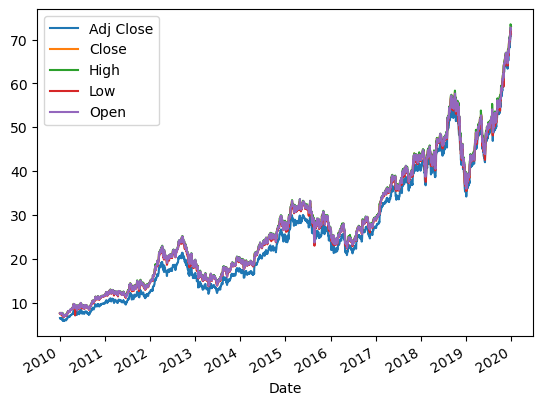

In [8]:
plotColumns = ['Adj Close','Close','High','Low','Open']
df.loc[:,plotColumns].plot()

<Axes: xlabel='Date'>

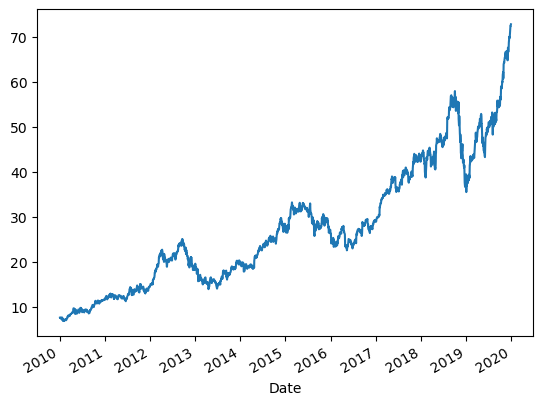

In [9]:
df.Close.plot()

<Axes: xlabel='Date'>

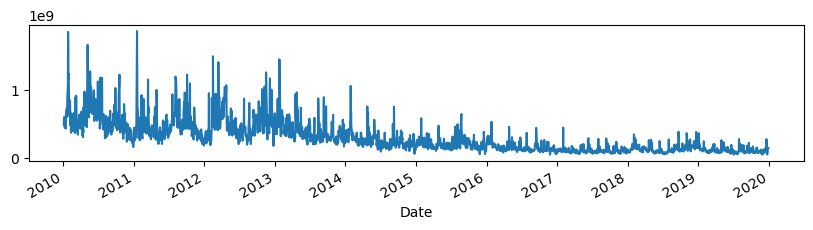

In [10]:
df.Volume.plot(figsize=(10,2))

## Resample data

In [11]:
(df_raw
 .iloc[:, ::2]    ## Select every other column (AAP, not SPY)
 .pipe(fix_cols)  ## Rename columns using the function above
)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.507527,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.404016,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.392176,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.434673,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.355125,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.421066,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.798409,72.477501,72.495003,71.175003,71.205002,93121200


In [12]:
(df_raw
 .iloc[:, ::2]    ## Select every other column (AAP, not SPY)
 .pipe(fix_cols)  ## Rename columns using the function above
 .resample('M')   ## Aggregate dates by months
)

## Aggreagetes

In [13]:
(df_raw
 .iloc[:, ::2]    ## Select every other column (AAP, not SPY)
 .pipe(fix_cols)  ## Rename columns using the function above
 .resample('M')   ## Aggregate dates by months
 .Close
)

## Creates a group by object

In [14]:
(df_raw
 .iloc[:, ::2]    ## Select every other column (AAP, not SPY)
 .pipe(fix_cols)  ## Rename columns using the function above
 .resample('M')   ## Aggregate dates by months
 .Close
 .mean()
)

## Groups by months. Mean close values for the end of each month.

Date
2010-01-31     7.418402
2010-02-28     7.099850
2010-03-31     7.978960
2010-04-30     8.969592
2010-05-31     8.980768
                ...    
2019-08-31    51.239432
2019-09-30    54.498750
2019-10-31    58.821630
2019-11-30    65.630126
2019-12-31    68.917374
Freq: M, Name: Close, Length: 120, dtype: float64

In [15]:
(df_raw
 .iloc[:, ::2]    ## Select every other column (AAP, not SPY)
 .pipe(fix_cols)  ## Rename columns using the function above
 .resample('3M')   ## Aggregate dates by months
 .Close
 .mean()
)

## Groups by months. Mean close values for the end of 3 each month.

Date
2010-01-31     7.418402
2010-04-30     8.044042
2010-07-31     9.143073
2010-10-31     9.821205
2011-01-31    11.555351
2011-04-30    12.369280
2011-07-31    12.418384
2011-10-31    13.873478
2012-01-31    14.345749
2012-04-30    20.032633
2012-07-31    20.709291
2012-10-31    23.277103
2013-01-31    18.978473
2013-04-30    15.662190
2013-07-31    15.498984
2013-10-31    17.516143
2014-01-31    19.315380
2014-04-30    19.066206
2014-07-31    22.824029
2014-10-31    25.068385
2015-01-31    28.025820
2015-04-30    31.563266
2015-07-31    31.813906
2015-10-31    28.296719
2016-01-31    27.423729
2016-04-30    25.596548
2016-07-31    24.171786
2016-10-31    27.823654
2017-01-31    28.651976
2017-04-30    34.793565
2017-07-31    37.372226
2017-10-31    39.544769
2018-01-31    43.195444
2018-04-30    42.688853
2018-07-31    47.028906
2018-10-31    54.637731
2019-01-31    42.518443
2019-04-30    46.405082
2019-07-31    49.149063
2019-10-31    54.925231
2020-01-31    67.273750
Freq: 3M, N

In [16]:
(df_raw
 .iloc[:, ::2]    ## Select every other column (AAP, not SPY)
 .pipe(fix_cols)  ## Rename columns using the function above
 .resample('Q')   ## Aggregate dates by months
 .Close
 .mean()
)

## Groups by months. Mean close values for quarterly values

Date
2010-03-31     7.530539
2010-06-30     9.097818
2010-09-30     9.282327
2010-12-31    11.124810
2011-03-31    12.345829
2011-06-30    12.057585
2011-09-30    13.589654
2011-12-31    13.987806
2012-03-31    17.988566
2012-06-30    20.753220
2012-09-30    22.876553
2012-12-31    20.634424
2013-03-31    16.649083
2013-06-30    15.383677
2013-09-30    16.580195
2013-12-31    18.891892
2014-03-31    19.021593
2014-06-30    21.279382
2014-09-30    24.540859
2014-12-31    27.205313
2015-03-31    30.194262
2015-06-30    31.984524
2015-09-30    29.325859
2015-12-31    28.574844
2016-03-31    24.913770
2016-06-30    24.850313
2016-09-30    26.466523
2016-12-31    28.349762
2017-03-31    32.928145
2017-06-30    36.968849
2017-09-30    38.792262
2017-12-31    41.787064
2018-03-31    43.047828
2018-06-30    45.349141
2018-09-30    52.075000
2018-12-31    48.478016
2019-03-31    42.415943
2019-06-30    48.723175
2019-09-30    52.280195
2019-12-31    64.188055
Freq: Q-DEC, Name: Close, dtype: fl

Month close values

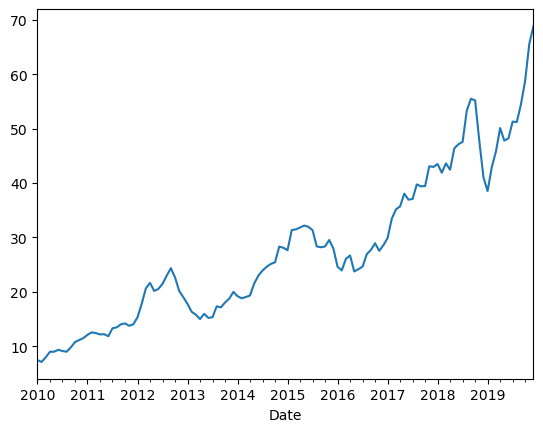

In [17]:
(df_raw
 .iloc[:, ::2]    ## Select every other column (AAP, not SPY)
 .pipe(fix_cols)  ## Rename columns using the function above
 .resample('M')   ## Aggregate dates by months
 .Close
 .mean()
 .plot()
);

## Candlestick plot

In [18]:
df_raw.iloc[:, ::2].head(10)

,Adj Close,Close,High,Low,Open,Volume
,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.507527,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.404016,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.392176,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.434673,7.570714,7.571429,7.466429,7.510714,447610800
2010-01-11,6.377909,7.503929,7.607143,7.444643,7.600000,462229600
2010-01-12,6.305359,7.418571,7.491786,7.372143,7.471071,594459600
2010-01-13,6.394301,7.523214,7.533214,7.289286,7.423929,605892000


In [19]:
(df_raw
 .iloc[:, ::2]    ## Select every other column (AAP, not SPY)
 .pipe(fix_cols)  ## Rename columns using the function above
 .resample('d')   ## Aggregate dates by day (not required for days, but can easily modify moving forward
 .agg({'Open':'first',       
       'High':'max',
       'Low':'min', 
       'Close':'last'})
 .loc['Jan 2018':'Jun 2018']
)

,Open,High,Low,Close
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,42.540001,43.075001,42.314999,43.064999
2018-01-03,43.132500,43.637501,42.990002,43.057499
2018-01-04,43.134998,43.367500,43.020000,43.257500
2018-01-05,43.360001,43.842499,43.262501,43.750000
...,...,...,...,...
2018-06-26,45.747501,46.632500,45.634998,46.107498
2018-06-27,46.307499,46.820000,46.007500,46.040001
2018-06-28,46.025002,46.552502,45.950001,46.375000


In [20]:
def plot_candle(df, ax):

    ## Vertical bar (wick)
    ax.vlines(df.index, ymax=df.High, ymin=df.Low, colors = 'k', linewidth=1)
    
    ## red - decrease (if Open is greater than close)
    red = df.query('Open > Close')
    ax.vlines(x=red.index, ymax=red.Open, ymin=red.Close, colors='r', linewidth=3)
    
    ## green - decrease (if Open is less than close)
    green = df.query('Open <= Close')
    ax.vlines(x=green.index, ymax=green.Open, ymin=green.Close, colors='g', linewidth=3)
    
    ## XAXIS
    ax.xaxis.set_major_locator(dates.MonthLocator())           ## Mark the months as major
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y')) ## Format the dates by Mon - Year
    ax.xaxis.set_minor_locator(dates.DayLocator())             ## Minor locator adds ticks for the lines (smaller)

    return df     ## Return the DataFrame + Plot

,Open,High,Low,Close
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,42.540001,43.075001,42.314999,43.064999
2018-01-03,43.132500,43.637501,42.990002,43.057499
2018-01-04,43.134998,43.367500,43.020000,43.257500
2018-01-05,43.360001,43.842499,43.262501,43.750000
...,...,...,...,...
2018-06-26,45.747501,46.632500,45.634998,46.107498
2018-06-27,46.307499,46.820000,46.007500,46.040001
2018-06-28,46.025002,46.552502,45.950001,46.375000


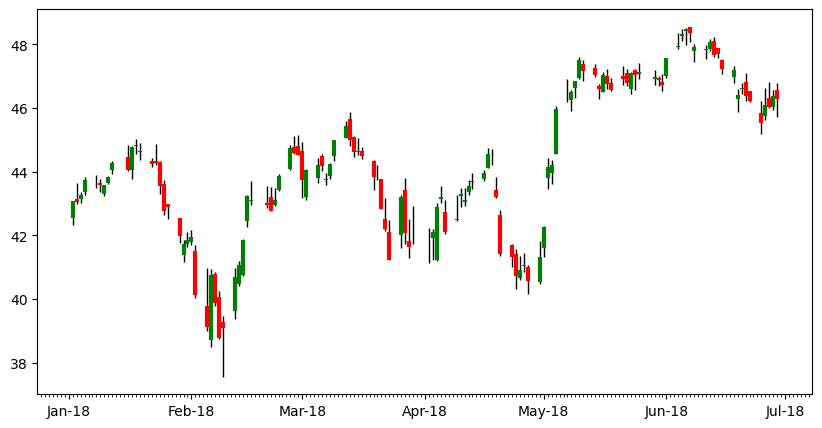

In [21]:
## Create fix and ax
fix, ax = plt.subplots(figsize = (10,5))

(df_raw
 .iloc[:, ::2]    ## Select every other column (AAP, not SPY)
 .pipe(fix_cols)  ## Rename columns using the function above
 .resample('d')   ## Aggregate dates by day (not required for days, but can easily modify moving forward
 .agg({'Open':'first',       
       'High':'max',
       'Low':'min', 
       'Close':'last'})
 .loc['Jan 2018':'Jun 2018']
 .pipe(plot_candle, ax)
)

## Calculate returns

In [22]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]   ## Get the first column index 
    df.columns = outer                    ## Replace columns with the first index
    return df

appl = (df_raw
        .iloc[:,::2]
        .pipe(fix_cols)
       )

appl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.507527,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.404016,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.392176,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.434673,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.355125,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.421066,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.798409,72.477501,72.495003,71.175003,71.205002,93121200


In [23]:
appl.pct_change()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098
2010-01-06,-0.015906,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646
2010-01-07,-0.001849,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882
2010-01-08,0.006648,0.006648,0.000000,0.000048,-0.006848,-0.061871
...,...,...,...,...,...,...
2019-12-23,0.016319,0.016318,0.005661,0.006498,-0.006023,-0.642827
2019-12-24,0.000951,0.000951,0.002252,0.009095,0.014829,-0.508189
2019-12-26,0.019840,0.019840,0.017867,0.006292,0.000457,0.920864


In [24]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]   ## Get the first column index 
    df.columns = outer                    ## Replace columns with the first index
    return df

appl = (df_raw
        .iloc[:,::2]
        .pipe(fix_cols)
        .assign(
            pct_chg_Adj_Close = lambda _df: _df['Adj Close'].pct_change(),
            pct_chg_Close = lambda _df: _df['Close'].pct_change(),
            pct_chg_High = lambda _df: _df['High'].pct_change(),
            pct_chg_Low = lambda _df: _df['Low'].pct_change(),
            pct_chg_Open = lambda _df: _df['Open'].pct_change(),
            pct_chg_Volume = lambda _df: _df['Volume'].pct_change()
        )
       )

appl

,Adj Close,Close,High,Low,Open,Volume,pct_chg_Adj_Close,pct_chg_Close,pct_chg_High,pct_chg_Low,pct_chg_Open,pct_chg_Volume
Date,,,,,,,,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.507527,7.656429,7.699643,7.616071,7.664286,601904800,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098
2010-01-06,6.404016,7.534643,7.686786,7.526786,7.656429,552160000,-0.015906,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646
2010-01-07,6.392176,7.520714,7.571429,7.466071,7.562500,477131200,-0.001849,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882
2010-01-08,6.434673,7.570714,7.571429,7.466429,7.510714,447610800,0.006648,0.006648,0.000000,0.000048,-0.006848,-0.061871
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,69.355125,71.000000,71.062500,70.092499,70.132500,98572000,0.016319,0.016318,0.005661,0.006498,-0.006023,-0.642827
2019-12-24,69.421066,71.067497,71.222504,70.730003,71.172501,48478800,0.000951,0.000951,0.002252,0.009095,0.014829,-0.508189
2019-12-26,70.798409,72.477501,72.495003,71.175003,71.205002,93121200,0.019840,0.019840,0.017867,0.006292,0.000457,0.920864


## Plotting returns

### Simple line

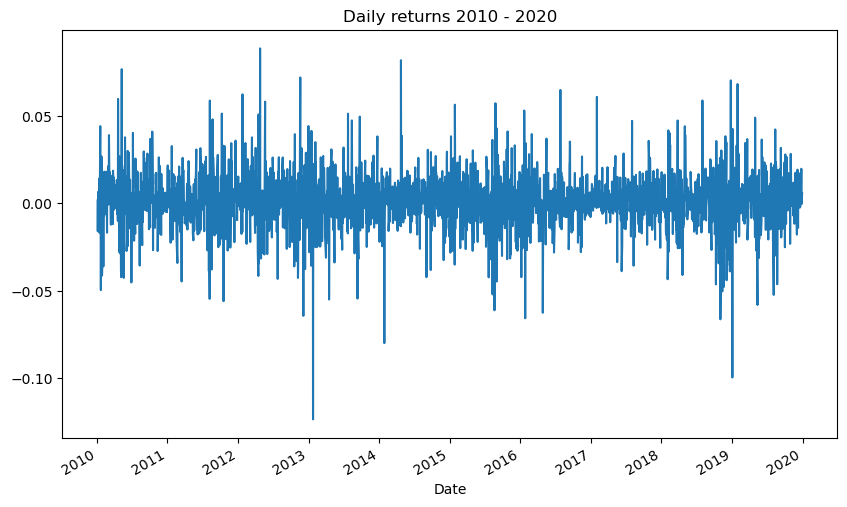

In [25]:
(appl
 .pct_chg_Close
 .plot(figsize=(10,6), title = 'Daily returns 2010 - 2020')
);

## Histogram

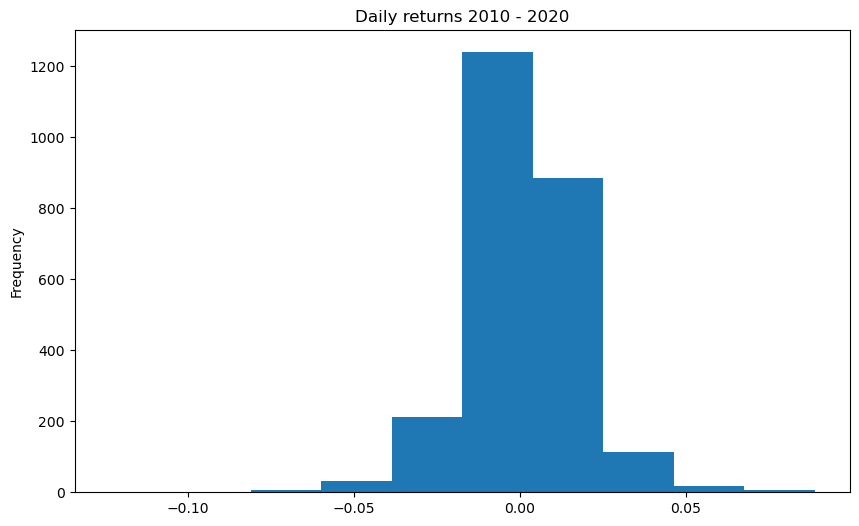

In [26]:
(appl
 .pct_chg_Close
 .plot(kind = 'hist', figsize=(10,6), title = 'Daily returns 2010 - 2020')
);

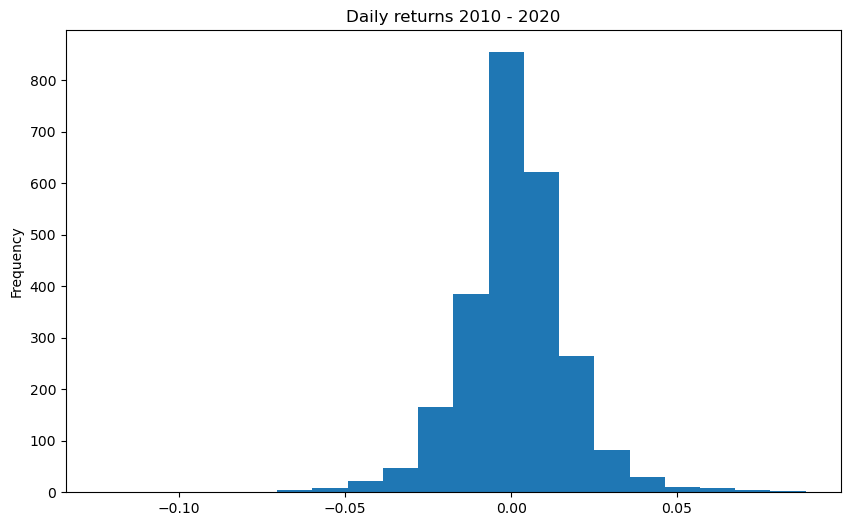

In [27]:
(appl
 .pct_chg_Close
 .plot(kind = 'hist', bins=20, figsize=(10,6), title = 'Daily returns 2010 - 2020')
);

### Bar

<Axes: xlabel='Date'>

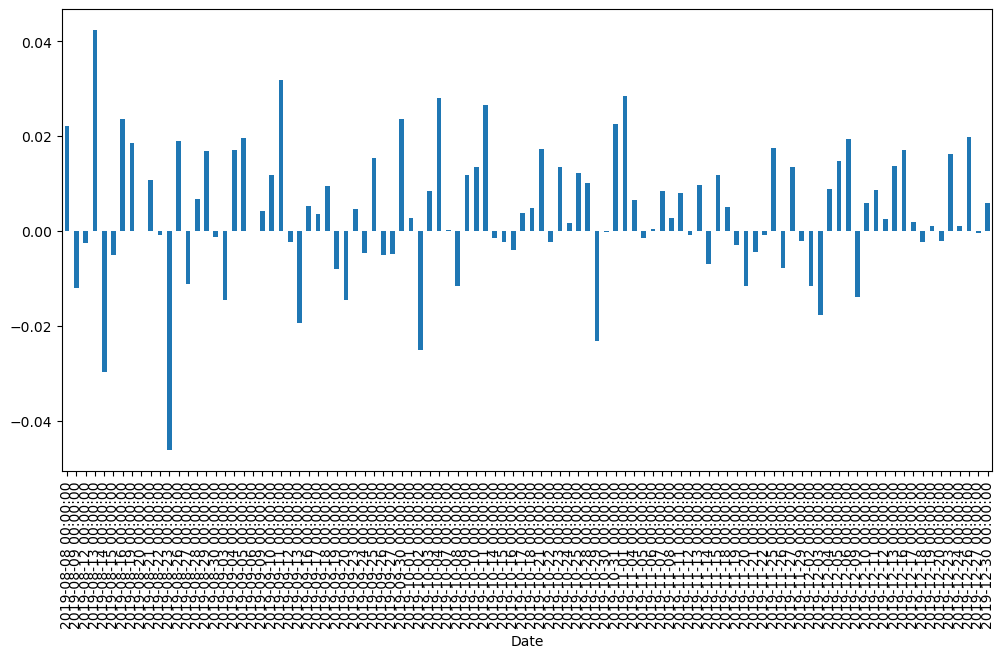

In [28]:
(appl
 .iloc[-100:]       ## Last hundred values
 .pct_chg_Close
 .plot(kind = 'bar', figsize=(12,6))
)

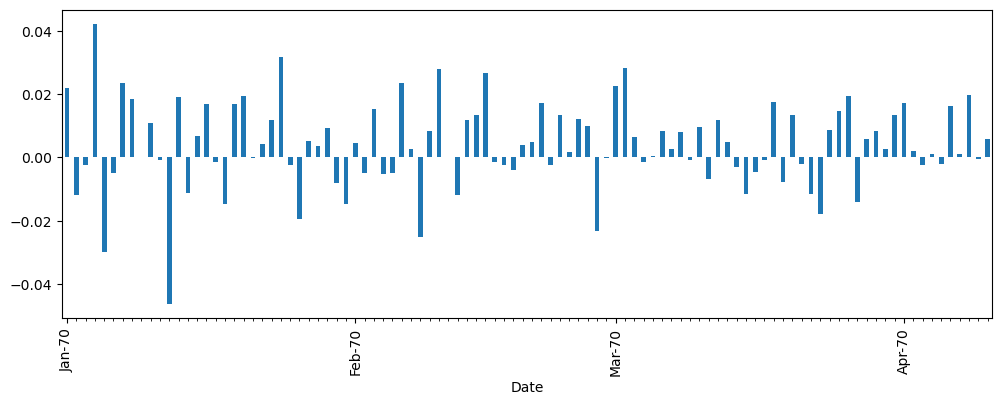

In [29]:
## Pandas bar turns dates to categories causing an issue with the dates in the x axis.

fig, ax = plt.subplots(figsize=(12,4))

(appl
 .iloc[-100:]       ## Last hundred values
 .pct_chg_Close
 .plot(kind = 'bar', ax = ax)
)

ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator())

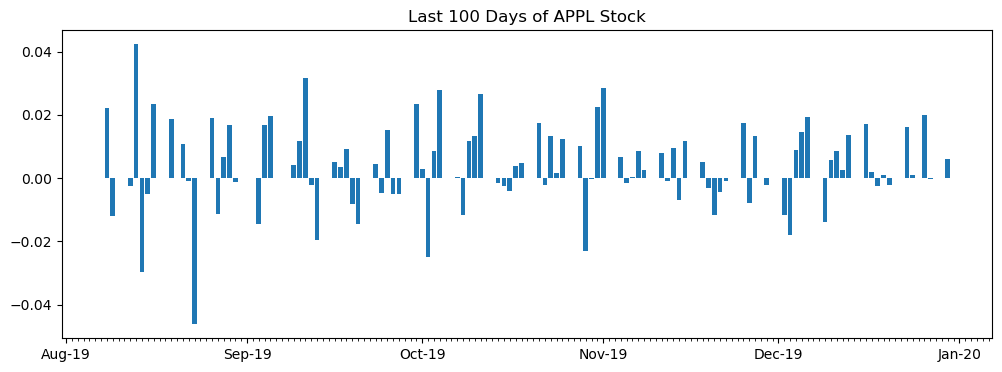

In [30]:
def my_bar(ser, ax, dateformat, title):
    ax.bar(x= ser.index, height=ser.values)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter(dateformat))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    ax.set_title(title)

fig, ax = plt.subplots(figsize=(12,4))

(appl
 .iloc[-100:]       ## Last hundred values
 .pct_chg_Close
 .pipe(my_bar, ax, '%b-%y', 'Last 100 Days of APPL Stock')
)

## Cumulative Returns
Calculate the amount that an investment has gained or lost over time.

<Axes: xlabel='Date'>

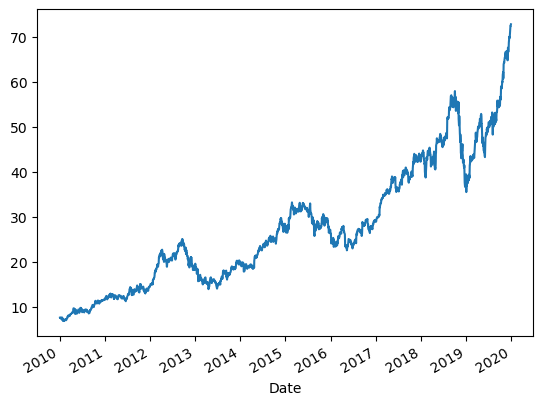

In [31]:
appl.Close.plot()

In [32]:
(appl
 .Close
 .sub(appl.Close[0])   ## Substract the first value of close with all values to see the increase
 # .div(appl.Close[0])   ## Calculate return (up over 8.5 times original investment)
)

Date
2010-01-04     0.000000
2010-01-05     0.013215
2010-01-06    -0.108571
2010-01-07    -0.122500
2010-01-08    -0.072500
                ...    
2019-12-23    63.356786
2019-12-24    63.424283
2019-12-26    64.834287
2019-12-27    64.806783
2019-12-30    65.236783
Name: Close, Length: 2515, dtype: float64

In [33]:
(72.88 - 7.64) / 7.64

8.539267015706805

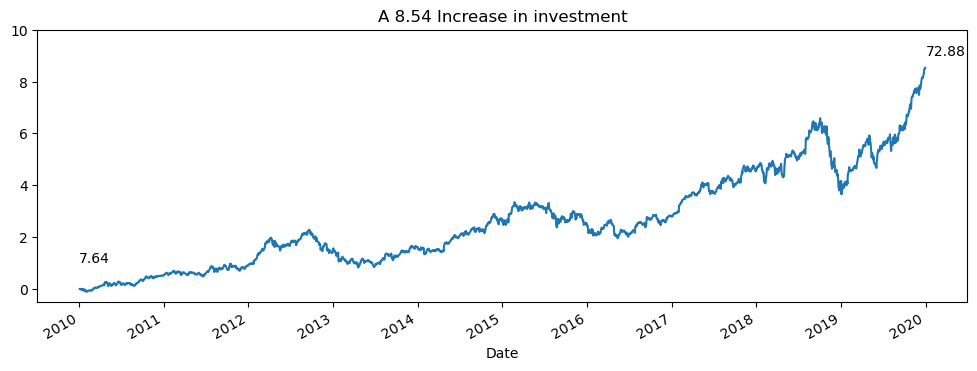

In [34]:
fig, ax = plt.subplots(figsize=(12,4))
(appl
 .Close
 .sub(appl.Close[0])   ## Substract the first value of close with all values to see the increase
 .div(appl.Close[0])   ## Calculate return (up over 8.5 times original investment)
 .plot(ax = ax)
)

## Title
max = (appl
       .Close
       .sub(appl.Close[0])   ## Substract the first value of close with all values to see the increase
       .div(appl.Close[0])   ## Calculate return (up over 8.5 times original investment)
       .iloc[-1]
)

ax.set_title(f'A {round(max,2)} Increase in investment')

## Modify y axis
ax.set_ylim([-.5, 10])


## Add annotations to visualization
StartYear = str(appl.index.min().year)
StartPrice = str(appl.Close.iloc[0].round(2))
EndYear = str(appl.index.max().year + 1)
EndPrice = str(appl.Close.iloc[-1].round(2))

ax.annotate(StartPrice,(StartYear,1))
ax.annotate(EndPrice,(EndYear,9));

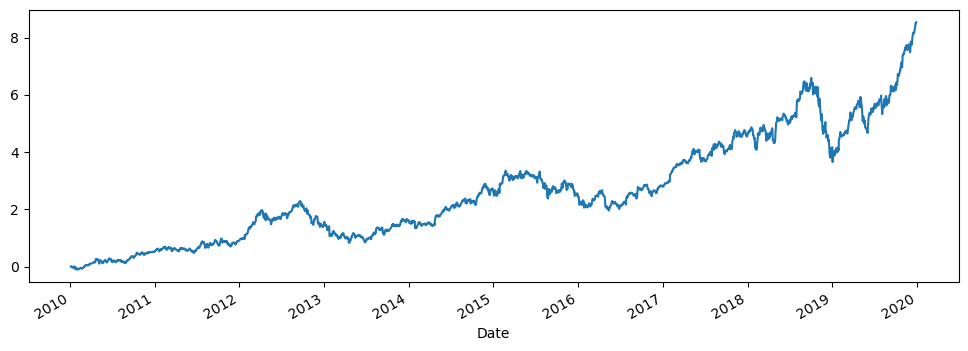

In [35]:
## Alternate method

(appl
 .pct_chg_Close
 .add(1)
 .cumprod()
 .sub(1)
 .plot(figsize=(12,4))
);

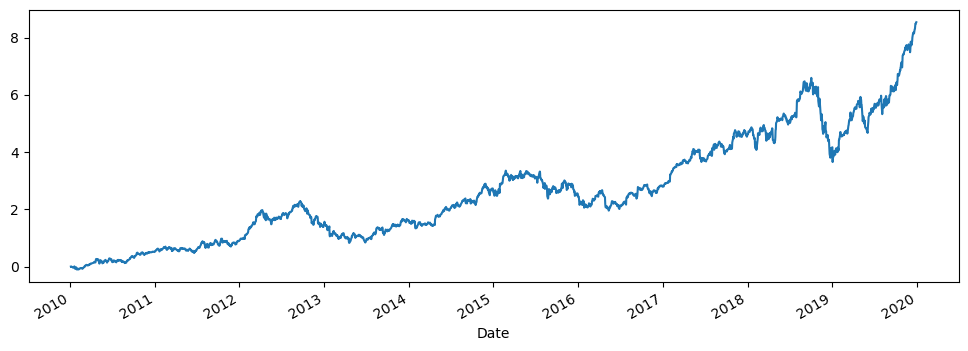

In [36]:
## Alternate method with pipe

def calc_cum_returns(df, col):
    ser = df[col]
    return (ser
            .sub(ser[0])
            .div(ser[0])
    )

(appl
 .pipe(calc_cum_returns, 'Close')
 .plot(figsize=(12,4))
);

In [37]:
## Alternate method
def get_returns(df):
    return calc_cum_returns(df, 'Close')

get_returns(appl)

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-23    8.289286
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
Name: Close, Length: 2515, dtype: float64

In [38]:
(lambda df: get_returns(df))(appl)

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.014205
2010-01-07   -0.016027
2010-01-08   -0.009486
                ...   
2019-12-23    8.289286
2019-12-24    8.298117
2019-12-26    8.482594
2019-12-27    8.478996
2019-12-30    8.535255
Name: Close, Length: 2515, dtype: float64

In [39]:
(appl
 .assign(cum_returns = lambda df: calc_cum_returns(df, 'Close'))
)

,Adj Close,Close,High,Low,Open,Volume,pct_chg_Adj_Close,pct_chg_Close,pct_chg_High,pct_chg_Low,pct_chg_Open,pct_chg_Volume,cum_returns
Date,,,,,,,,,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2010-01-05,6.507527,7.656429,7.699643,7.616071,7.664286,601904800,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098,0.001729
2010-01-06,6.404016,7.534643,7.686786,7.526786,7.656429,552160000,-0.015906,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646,-0.014205
2010-01-07,6.392176,7.520714,7.571429,7.466071,7.562500,477131200,-0.001849,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882,-0.016027
2010-01-08,6.434673,7.570714,7.571429,7.466429,7.510714,447610800,0.006648,0.006648,0.000000,0.000048,-0.006848,-0.061871,-0.009486
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,69.355125,71.000000,71.062500,70.092499,70.132500,98572000,0.016319,0.016318,0.005661,0.006498,-0.006023,-0.642827,8.289286
2019-12-24,69.421066,71.067497,71.222504,70.730003,71.172501,48478800,0.000951,0.000951,0.002252,0.009095,0.014829,-0.508189,8.298117
2019-12-26,70.798409,72.477501,72.495003,71.175003,71.205002,93121200,0.019840,0.019840,0.017867,0.006292,0.000457,0.920864,8.482594


## Volatility

In [40]:
(appl
 .Close
 .mean()
)

27.568102107796943

In [41]:
(appl
 .Close
 .std()
)

14.016253049378737

In [42]:
(appl
 .pct_chg_Close
 .std()

)

0.01623613318144792

### Rolling volatility

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

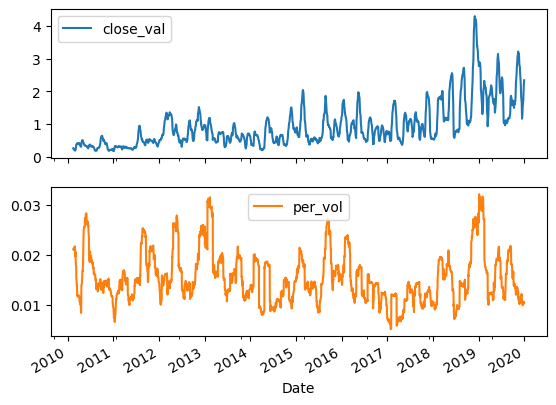

In [43]:
(appl
 .assign(
     close_val = appl.rolling(30).Close.std(),           ## 30 day rolling std
     per_vol = appl.Close.pct_change().rolling(30).std() ## 30 day pct change std
        )
 .iloc[:, -2:]          ## Get last two new columns
 .plot(subplots=True)
)

### Agg days volatility

In [44]:
## 15 days agg
(appl
 .resample('15D')
 .std()
)

,Adj Close,Close,High,Low,Open,Volume,pct_chg_Adj_Close,pct_chg_Close,pct_chg_High,pct_chg_Low,pct_chg_Open,pct_chg_Volume
Date,,,,,,,,,,,,
2010-01-04,0.078159,0.091958,0.072060,0.101749,0.080372,7.028347e+07,0.010383,0.010383,0.008301,0.012009,0.010090,0.213853
2010-01-19,0.227055,0.267141,0.253188,0.232856,0.234097,4.361002e+08,0.030046,0.030046,0.021867,0.022110,0.022079,0.335223
2010-02-03,0.113202,0.133188,0.102614,0.124059,0.123349,1.455474e+08,0.017088,0.017088,0.010689,0.012546,0.012504,0.314687
2010-02-18,0.137102,0.161306,0.138608,0.166270,0.157960,9.844200e+07,0.011254,0.011254,0.008232,0.012262,0.013008,0.254131
2010-03-05,0.074374,0.087505,0.088090,0.113449,0.129484,1.951401e+08,0.014002,0.014002,0.014543,0.015027,0.013723,0.639837
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-29,1.745937,1.725581,1.449098,2.018594,1.418779,2.960150e+07,0.013529,0.013412,0.011383,0.019282,0.011924,0.241577
2019-11-13,0.515545,0.527773,0.404718,0.436709,0.509585,1.787058e+07,0.009868,0.009868,0.006071,0.007502,0.007982,0.278190
2019-11-28,0.975707,0.998849,1.019784,0.918851,0.936544,2.826525e+07,0.012526,0.012526,0.013963,0.013703,0.013687,0.469737


In [45]:
## Rolling windows
(appl
 .rolling(window=15, min_periods=15)
 .std()
)

,Adj Close,Close,High,Low,Open,Volume,pct_chg_Adj_Close,pct_chg_Close,pct_chg_High,pct_chg_Low,pct_chg_Open,pct_chg_Volume
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,1.844995,1.888754,1.932242,1.953716,1.906586,4.891036e+07,0.010997,0.010997,0.012333,0.012274,0.012911,0.574605
2019-12-24,1.733755,1.774875,1.762143,1.842910,1.836871,5.206250e+07,0.009136,0.009136,0.007188,0.008695,0.008253,0.595549
2019-12-26,1.755492,1.797126,1.757091,1.821097,1.758186,5.084715e+07,0.009786,0.009786,0.007504,0.008198,0.008308,0.618085


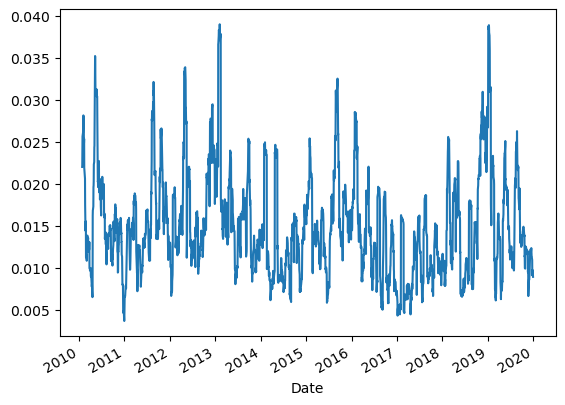

In [46]:
(appl
 .rolling(window=15, min_periods=15)
 .std()
 .loc[:,'pct_chg_Close']
 .plot()
);

## Rolling windows

In [47]:
## Reset dataframe
appl = (df_raw
        .iloc[:,::2]
        .pipe(fix_cols)
       )

appl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.507527,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.404016,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.392176,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.434673,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.355125,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.421066,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.798409,72.477501,72.495003,71.175003,71.205002,93121200


In [48]:
(appl
 .assign(
     s1 = appl.Close.shift(1),     ## Shift value down 1
     s2 = appl.Close.shift(2),     ## Shift value down 2
     ma3 = lambda _df: _df.loc[:,['Close','s1','s2']].mean(axis = 'columns'),  ## Calculate mean
     ma3_builtin = appl.Close.rolling(3).mean()    ## Rollin gavg, similar to ma3
 )
)

,Adj Close,Close,High,Low,Open,Volume,s1,s2,ma3,ma3_builtin
Date,,,,,,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500,493729600,NaN,NaN,7.643214,NaN
2010-01-05,6.507527,7.656429,7.699643,7.616071,7.664286,601904800,7.643214,NaN,7.649822,NaN
2010-01-06,6.404016,7.534643,7.686786,7.526786,7.656429,552160000,7.656429,7.643214,7.611429,7.611429
2010-01-07,6.392176,7.520714,7.571429,7.466071,7.562500,477131200,7.534643,7.656429,7.570595,7.570595
2010-01-08,6.434673,7.570714,7.571429,7.466429,7.510714,447610800,7.520714,7.534643,7.542024,7.542024
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,69.355125,71.000000,71.062500,70.092499,70.132500,98572000,69.860001,70.004997,70.288333,70.288333
2019-12-24,69.421066,71.067497,71.222504,70.730003,71.172501,48478800,71.000000,69.860001,70.642499,70.642499
2019-12-26,70.798409,72.477501,72.495003,71.175003,71.205002,93121200,71.067497,71.000000,71.514999,71.514999


<Axes: xlabel='Date'>

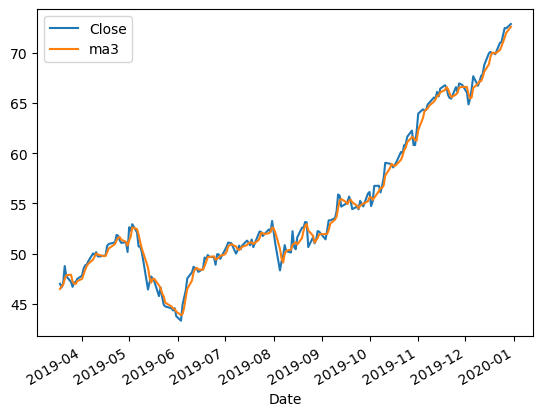

In [49]:
(appl
 .assign(
     s1 = appl.Close.shift(1),     ## Shift value down 1
     s2 = appl.Close.shift(2),     ## Shift value down 2
     ma3 = lambda _df: _df.loc[:,['Close','s1','s2']].mean(axis = 'columns'),  ## Calculate mean
     ma3_builtin = appl.Close.rolling(3).mean()    ## Rollin gavg, similar to ma3
 )
 .loc[:,['Close','ma3']]
 .iloc[-200:]
 .plot()
)

<Axes: xlabel='Date'>

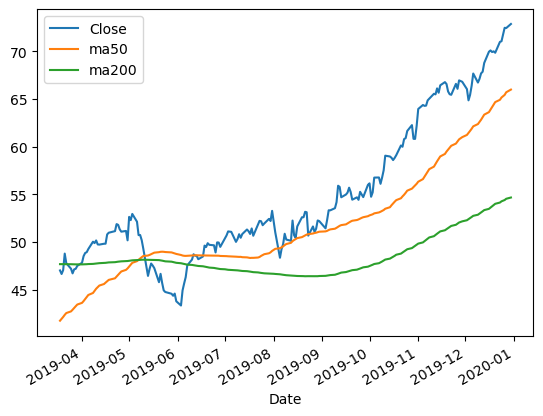

In [50]:
(appl
 .assign(
     ma50 = appl.Close.rolling(50).mean(),    ## Rollin avg, similar to ma3
     ma200 = appl.Close.rolling(200).mean()
 )
 .loc[:,['Close','ma50', 'ma200']]
 .iloc[-200:]
 .plot()
)

<Axes: xlabel='Date'>

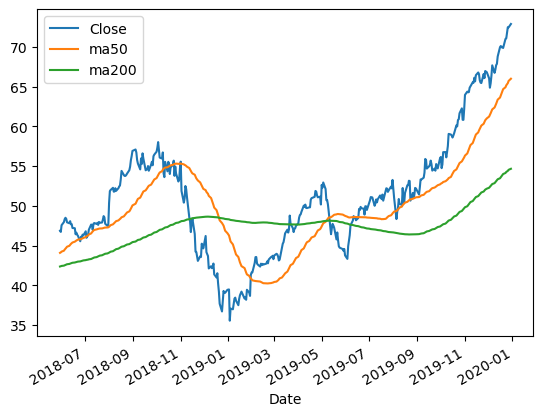

In [51]:
(appl
 .assign(
     ma50 = appl.Close.rolling(50).mean(),    ## Rollin avg, similar to ma3
     ma200 = appl.Close.rolling(200).mean()
 )
 .loc[:,['Close','ma50', 'ma200']]
 .iloc[-400:]
 .plot()
)

## On-Balance Volume (OBV)



In [56]:
appl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.507527,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.404016,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.392176,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.434673,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.355125,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.421066,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.798409,72.477501,72.495003,71.175003,71.205002,93121200


In [57]:
appl.Close

Date
2010-01-04     7.643214
2010-01-05     7.656429
2010-01-06     7.534643
2010-01-07     7.520714
2010-01-08     7.570714
                ...    
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
Name: Close, Length: 2515, dtype: float64

In [58]:
appl.Close.shift(1)

Date
2010-01-04          NaN
2010-01-05     7.643214
2010-01-06     7.656429
2010-01-07     7.534643
2010-01-08     7.520714
                ...    
2019-12-23    69.860001
2019-12-24    71.000000
2019-12-26    71.067497
2019-12-27    72.477501
2019-12-30    72.449997
Name: Close, Length: 2515, dtype: float64

In [55]:
## Method one

def calc_obv(df):
    df = df.copy()
    df['OBV'] = 0
    
    for i in range(1,len(df)):
        if df['Close'][i] > df['Close'][i-1]:
            df['OBV'][i] = df['OBV'][i-1] + df['Volume'][i]
        elif df['Close'][i] < df['Close'][i-1]:
            df['OBV'][i] = df['OBV'][i-1] - df['Volume'][i]
        else:
            df['OBV'][i] = df['OBV'][i -1]
    
    return df

calc_obv(appl)

C:\Users\pestyl\AppData\Local\Temp\ipykernel_18064\406413533.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OBV'][i] = df['OBV'][i-1] + df['Volume'][i]
C:\Users\pestyl\AppData\Local\Temp\ipykernel_18064\406413533.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OBV'][i] = df['OBV'][i-1] - df['Volume'][i]
C:\Users\pestyl\AppData\Local\Temp\ipykernel_18064\406413533.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

,Adj Close,Close,High,Low,Open,Volume,OBV
Date,,,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500,493729600,0
2010-01-05,6.507527,7.656429,7.699643,7.616071,7.664286,601904800,601904800
2010-01-06,6.404016,7.534643,7.686786,7.526786,7.656429,552160000,49744800
2010-01-07,6.392176,7.520714,7.571429,7.466071,7.562500,477131200,-427386400
2010-01-08,6.434673,7.570714,7.571429,7.466429,7.510714,447610800,20224400
...,...,...,...,...,...,...,...
2019-12-23,69.355125,71.000000,71.062500,70.092499,70.132500,98572000,14165094000
2019-12-24,69.421066,71.067497,71.222504,70.730003,71.172501,48478800,14213572800
2019-12-26,70.798409,72.477501,72.495003,71.175003,71.205002,93121200,14306694000


In [59]:
pd.Series(np.select(condlist = [appl.Close < 7.6, appl.Close > 72],
                    choicelist = [7.55, 72], default = 33))

0       33.00
1       33.00
2        7.55
3        7.55
4        7.55
        ...  
2510    33.00
2511    33.00
2512    72.00
2513    72.00
2514    72.00
Length: 2515, dtype: float64

In [60]:
(appl
 .assign(vol = np.select([appl.Close > appl.Close.shift(1),
                          appl.Close == appl.Close.shift(1),
                          appl.Close < appl.Close.shift(1)],
                         [appl.Volume,
                          0,
                          -appl.Volume]),
         obv = lambda df_ : df_.vol.cumsum()
 )
)

,Adj Close,Close,High,Low,Open,Volume,vol,obv
Date,,,,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500,493729600,0,0
2010-01-05,6.507527,7.656429,7.699643,7.616071,7.664286,601904800,601904800,601904800
2010-01-06,6.404016,7.534643,7.686786,7.526786,7.656429,552160000,-552160000,49744800
2010-01-07,6.392176,7.520714,7.571429,7.466071,7.562500,477131200,-477131200,-427386400
2010-01-08,6.434673,7.570714,7.571429,7.466429,7.510714,447610800,447610800,20224400
...,...,...,...,...,...,...,...,...
2019-12-23,69.355125,71.000000,71.062500,70.092499,70.132500,98572000,98572000,14165094000
2019-12-24,69.421066,71.067497,71.222504,70.730003,71.172501,48478800,48478800,14213572800
2019-12-26,70.798409,72.477501,72.495003,71.175003,71.205002,93121200,93121200,14306694000


In [76]:
def calc_obv(df, close_col = 'Close', vol_col = 'Volume'):
    close = df[close_col]   ## Set the close column
    vol = df[vol_col]       ## Set the volume column
    close_shift = close.shift(1)   ## Shift down one row to compare to previous values
    
    new_df = (df
              .assign(
                  vol = np.select([close > close_shift,
                                   close == close_shift,
                                   close < close_shift],
                                  [vol, 0, -vol]),
                  obv = lambda _df: _df.vol.fillna(0).cumsum()
              )
              .loc[:,'obv']
    )
    
    return new_df

In [77]:
calc_obv(appl)

Date
2010-01-04              0
2010-01-05      601904800
2010-01-06       49744800
2010-01-07     -427386400
2010-01-08       20224400
                 ...     
2019-12-23    14165094000
2019-12-24    14213572800
2019-12-26    14306694000
2019-12-27    14160428000
2019-12-30    14304542400
Name: obv, Length: 2515, dtype: int64

In [78]:
(appl
 .assign(obv = calc_obv)
)

,Adj Close,Close,High,Low,Open,Volume,obv
Date,,,,,,,
2010-01-04,6.496294,7.643214,7.660714,7.585000,7.622500,493729600,0
2010-01-05,6.507527,7.656429,7.699643,7.616071,7.664286,601904800,601904800
2010-01-06,6.404016,7.534643,7.686786,7.526786,7.656429,552160000,49744800
2010-01-07,6.392176,7.520714,7.571429,7.466071,7.562500,477131200,-427386400
2010-01-08,6.434673,7.570714,7.571429,7.466429,7.510714,447610800,20224400
...,...,...,...,...,...,...,...
2019-12-23,69.355125,71.000000,71.062500,70.092499,70.132500,98572000,14165094000
2019-12-24,69.421066,71.067497,71.222504,70.730003,71.172501,48478800,14213572800
2019-12-26,70.798409,72.477501,72.495003,71.175003,71.205002,93121200,14306694000


In [71]:
calc_obv(appl)

1.99 ms ± 251 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [83]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Accumulation/Distribution Indicator (A/D) 

In [84]:
(appl
 .assign(
     mfm = ((appl.Close - appl.Low) - (appl.High - appl.Close)) / (appl.High - appl.Low),
     mfv = lambda _df : _df.mfm * _df.Volume,
     cmfv = lambda _df : _df.mfv.cumsum()
 )
)

,Adj Close,Close,High,Low,Open,Volume,mfm,mfv,cmfv
Date,,,,,,,,,
2010-01-04,6.49629,7.64321,7.66071,7.58500,7.62250,493729600,0.53774,265496575.01008,265496575.01008
2010-01-05,6.50753,7.65643,7.69964,7.61607,7.66429,601904800,-0.03418,-20574859.82095,244921715.18912
2010-01-06,6.40402,7.53464,7.68679,7.52679,7.65643,552160000,-0.90178,-497928868.67633,-253007153.48721
2010-01-07,6.39218,7.52071,7.57143,7.46607,7.56250,477131200,0.03728,17787336.08085,-235219817.40636
2010-01-08,6.43467,7.57071,7.57143,7.46643,7.51071,447610800,0.98639,441516625.71117,206296808.30481
...,...,...,...,...,...,...,...,...,...
2019-12-23,69.35513,71.00000,71.06250,70.09250,70.13250,98572000,0.87113,85869438.66604,22651671153.19930
2019-12-24,69.42107,71.06750,71.22250,70.73000,71.17250,48478800,0.37053,17962982.62203,22669634135.82133
2019-12-26,70.79841,72.47750,72.49500,71.17500,71.20500,93121200,0.97348,90651818.35332,22760285954.17466


In [88]:
def calc_ad(df, close_col = 'Close', low_col = 'Low', high_col = 'High', vol_col = 'Volume'):
    close = df[close_col]
    low = df[low_col]
    high = df[high_col]
    volume = df[vol_col]
    
    new_df = (appl
              .assign(
                 mfm = ((close - low) - (high - close)) / (high - low),
                 mfv = lambda _df : _df.mfm * _df.Volume,
                 cmfv = lambda _df : _df.mfv.cumsum()
              )
              .loc[:,'cmfv']
    )
    
    return new_df

calc_ad(appl)

Date
2010-01-04     265496575.01008
2010-01-05     244921715.18912
2010-01-06    -253007153.48721
2010-01-07    -235219817.40636
2010-01-08     206296808.30481
                    ...       
2019-12-23   22651671153.19930
2019-12-24   22669634135.82133
2019-12-26   22760285954.17466
2019-12-27   22698028690.01791
2019-12-30   22796998309.40862
Name: cmfv, Length: 2515, dtype: float64

<Axes: xlabel='Date'>

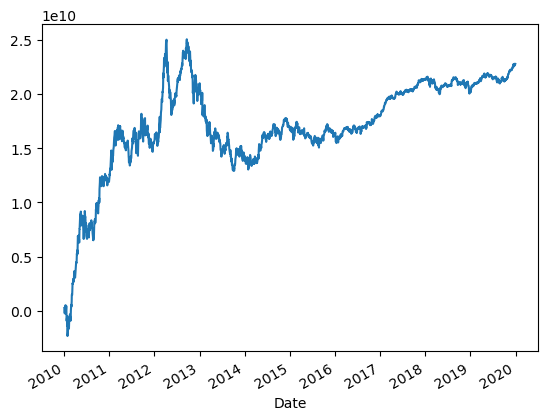

In [90]:
(appl
 .assign(ad = calc_ad)
 .loc[:,'ad']
 .plot()
)